### Pipeline gerarchica - Multicompressione mista

In [1]:
import collections
import networkx as nx
import matplotlib.pyplot as plt
from grandiso import find_motifs
from operator import itemgetter
from collections import defaultdict

In [2]:
%load_ext pycodestyle_magic
# %%pycodestyle

#### Grafo test di base `G`

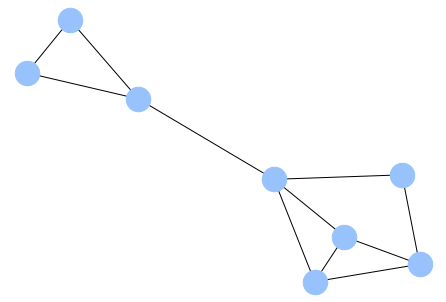

In [94]:
# grafo test di base G

G0 = nx.Graph()

G0.add_edges_from([(7, 1), (8, 1), (7, 8), (1, 2), (2, 3), (2, 4), (2, 5), (4, 5), (3, 6), (4, 6), (5, 6)])
f = plt.figure()
nx.draw(G0, node_color='#97C2FC', node_size=600, edge_color='black', node_shape='o')

f.savefig("graph.png")

#### Sottografo `motif`

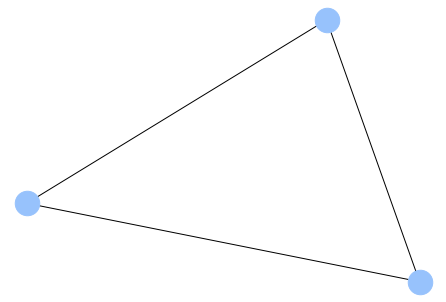

In [95]:
# Sottografo motif da trovare nel grafo G: TRIANGOLO

motif = nx.Graph()
motif.add_edges_from([(1, 2), (2, 3), (3, 1)])
# nx.draw(motif)
f = plt.figure()
nx.draw(motif, node_color='#97C2FC', node_size=600, edge_color='black', node_shape='o')

f.savefig("motif.png")

#### Rinomina nodi del grafo `G` in tuple `(livello, nodo)`

In [5]:
def rinomina(G):
    livello = 0
    nodi = list(G.nodes())
    lun = len(nodi)
    liv_list = [livello for x in range(lun)]
    lista_tuple = list(zip(liv_list, nodi))
    mapping = dict(zip(nodi, lista_tuple))
    G = nx.relabel_nodes(G, mapping)

    return G

#### Identify `motif` in `G`

In [6]:
def identify(motif, G):
    lista1 = find_motifs(motif, G)
    if lista1 == []:
        return lista1
    else:
        lista2 = [list(d.values()) for d in lista1]
        lista3 = list(set(tuple(sorted(s)) for s in lista2))
        lista4 = sorted(lista3)
        risultato = [list(el) for el in lista4]

        return risultato

#### Restituisce il mapping per la compressione

In [7]:
def zippa(results, nodes):
    # max_liv = max(results[0], key=lambda item:item[0])[0]
    max_liv = max(results[0], key=itemgetter(0))[0]
    lista_temp = []
    tri = []
    for x in nodes:
        if x in results[0]:
            # sostituisci il livello del primo nodo
            # (per comodità scelgo il primo) con il MAX+1
            x = list(x)
            x[0] = max_liv+1
            x = tuple(x)
            tri.append(x)
    if len(tri) == len(results[0]):
        for x in nodes:
            if x in results[0]:
                lista_temp.append(tri[0])
            else:
                lista_temp.append(x)
        mapping = dict(zip(nodes, lista_temp))

        return mapping

---

####  Funzione `multicoll`:
- Output: Liste di nodi e archi da cui si ricava il grafo risultate
- Nelle compressioni multiple il livello è gestito implicitamente

In [8]:
G = rinomina(G0)

In [9]:
def multicoll(G):
    n, a = [], []
    # nodi G
    nodi = list(G.nodes())
    nodi.sort(key=lambda x:x[1])
    archi = list(G.edges())
    n.append(nodi)
    a.append(archi)
    # chiama identify
    ris = identify(motif, G)
    while ris != []:
        ris = identify(motif, G)
        mapping = zippa(ris, nodi)
        G = nx.relabel_nodes(G, mapping)
        # togli triangolo usato
        # la lista ris diminuisce
        ris = ris[1:]
        # i nodi cambiano, sono il risultato della compressione
        nodi = list(G.nodes())
        nodi.sort(key=lambda x:x[1])
        archi = list(G.edges())
        n.append(nodi)
        a.append(archi)
    tot = list(zip(n, a))
    tup = ()
    lista = []
    for x in tot:
        max_liv = max(x[0], key=itemgetter(0))[0]
        l = len(x[0])
        tup = (max_liv, l, x[0], x[1])
        lista.append(tup)

    d = defaultdict(list)
    for name, num, nod, arc in lista:
        d[name].append((num, nod, arc))

    res = list(zip(d, map(min, d.values())))

    return res

In [10]:
res = multicoll(G)
livello, num_nodi, nodi, archi = [], [], [], []
for i in res:
    livello.append(i[0])
    num_nodi.append(i[1][0])
    nodi.append(i[1][1])
    archi.append(i[1][2])

print("Livello: ", livello, "\n# nodi: ", num_nodi,
      "\nNodi: ", nodi, "\nArchi: ", archi, "\n\n")

Livello:  [0, 1, 2] 
# nodi:  [8, 4, 2] 
Nodi:  [[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)], [(1, 1), (1, 2), (0, 3), (0, 6)], [(1, 1), (2, 2)]] 
Archi:  [[((0, 7), (0, 1)), ((0, 7), (0, 8)), ((0, 1), (0, 8)), ((0, 1), (0, 2)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 2), (0, 5)), ((0, 3), (0, 6)), ((0, 4), (0, 5)), ((0, 4), (0, 6)), ((0, 5), (0, 6))], [((1, 1), (1, 1)), ((1, 1), (1, 2)), ((1, 2), (0, 3)), ((1, 2), (1, 2)), ((1, 2), (0, 6)), ((0, 3), (0, 6))], [((1, 1), (1, 1)), ((1, 1), (2, 2)), ((2, 2), (2, 2))]] 




[((0, 7), (0, 1)), ((0, 7), (0, 8)), ((0, 1), (0, 8)), ((0, 1), (0, 2)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 2), (0, 5)), ((0, 3), (0, 6)), ((0, 4), (0, 5)), ((0, 4), (0, 6)), ((0, 5), (0, 6))]


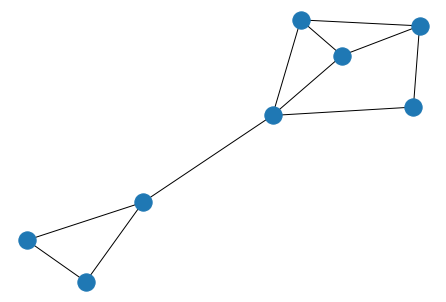

[((1, 1), (1, 1)), ((1, 1), (1, 2)), ((1, 2), (0, 3)), ((1, 2), (1, 2)), ((1, 2), (0, 6)), ((0, 3), (0, 6))]


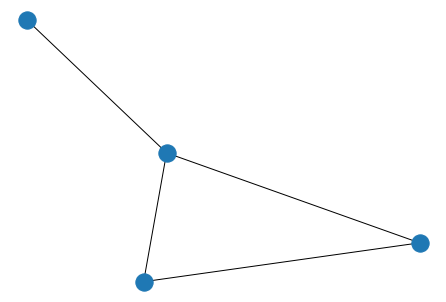

[((1, 1), (1, 1)), ((1, 1), (2, 2)), ((2, 2), (2, 2))]


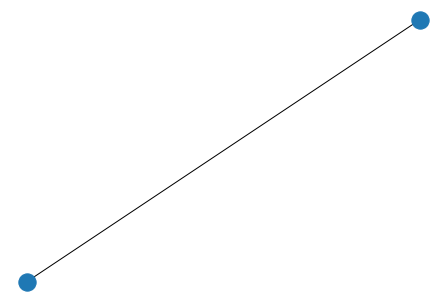

In [11]:
for i in archi:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    nx.draw(GG)
    plt.pause(1)
    plt.show()

---

#### MEMORIZZA merge, per poter ricostruire inversamente
Ora funziona con il primo mapping, da rendere iterabile

In [12]:
nodi = list(G.nodes())
nodi.sort(key=lambda x:x[1])
ris = identify(motif, G)
mapping = zippa(ris, nodi)
m = zippa(ris, nodi)

In [13]:
# Memorizza [(0, 1), (0, 7), (0, 8)] = (1, 1)
m

{(0, 1): (1, 1),
 (0, 2): (0, 2),
 (0, 3): (0, 3),
 (0, 4): (0, 4),
 (0, 5): (0, 5),
 (0, 6): (0, 6),
 (0, 7): (1, 1),
 (0, 8): (1, 1)}

In [14]:
def memo(mapping, n):
    value_occurrences = collections.Counter(mapping.values())
    filtered_dict = {key: value for key, value in mapping.items()
                     if value_occurrences[value] == n}
    new_list = []
    for i, j in filtered_dict.items():
        j = list(j)
        j = i
        j = tuple(j)
        new_list.append(j)
    a = [i for i in new_list[0]]
    a[0] = a[0]+1
    a = tuple(a)
    thisdict = {a: new_list}
    return thisdict

# n fisso a 3 perché graphlet di 3 nodi
memo(m, 3)

{(1, 1): [(0, 1), (0, 7), (0, 8)]}

***

### Indici

**Nodi compressi e nodi mantenuti, count e %**

In [15]:
def nodes_decrease(num_nodi):
    decrease = num_nodi[0] - num_nodi[-1]
    # % decrease = decrease ÷ grafo_0 × 100
    decrease_perc = decrease / num_nodi[0] * 100
    # remain = grafo_fin
    remain = num_nodi[-1]
    # remain_perc inverso di decrease_perc
    remain_perc = 100 - decrease_perc
    #remain_perc2 = len(grafo_fin) / len(grafo_0) * 100

    return (decrease, decrease_perc, remain, remain_perc)

nodes_decrease(num_nodi)

(6, 75.0, 2, 25.0)

#### Statistiche per livello

In [16]:
for i in res:
    print("Livello: ", i[0], "\n# nodi: ", i[1][0], "\nNodi: ",
          i[1][1], "\nArchi: ", i[1][2], "\n\n")

Livello:  0 
# nodi:  8 
Nodi:  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)] 
Archi:  [((0, 7), (0, 1)), ((0, 7), (0, 8)), ((0, 1), (0, 8)), ((0, 1), (0, 2)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 2), (0, 5)), ((0, 3), (0, 6)), ((0, 4), (0, 5)), ((0, 4), (0, 6)), ((0, 5), (0, 6))] 


Livello:  1 
# nodi:  4 
Nodi:  [(1, 1), (1, 2), (0, 3), (0, 6)] 
Archi:  [((1, 1), (1, 1)), ((1, 1), (1, 2)), ((1, 2), (0, 3)), ((1, 2), (1, 2)), ((1, 2), (0, 6)), ((0, 3), (0, 6))] 


Livello:  2 
# nodi:  2 
Nodi:  [(1, 1), (2, 2)] 
Archi:  [((1, 1), (1, 1)), ((1, 1), (2, 2)), ((2, 2), (2, 2))] 




---

#### Testare la funzione anche con altri motif

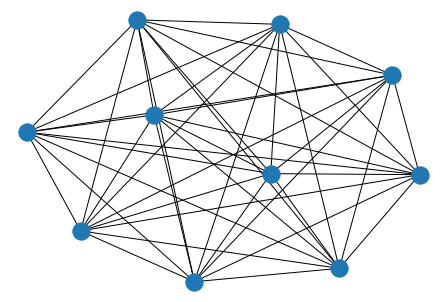

In [17]:
G0 = nx.complete_graph(10, create_using=None)
G = rinomina(G0)
nx.draw(G)

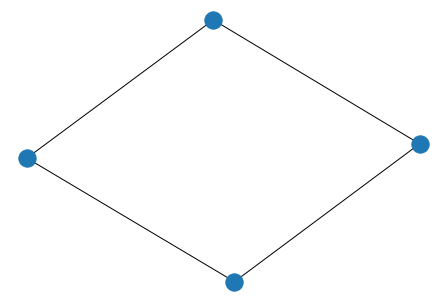

In [18]:
motif = nx.Graph()
motif.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])
nx.draw(motif)

In [19]:
ris = identify(motif, G)
nodi = list(G.nodes())
nodi.sort(key=lambda x:x[1])

In [20]:
res = multicoll(G)
livello, num_nodi, nodi, archi = [], [], [], []
for i in res:
    livello.append(i[0])
    num_nodi.append(i[1][0])
    nodi.append(i[1][1])
    archi.append(i[1][2])

print("Livello: ", livello, "\n# nodi: ", num_nodi,
      "\nNodi: ", nodi, "\nArchi: ", archi, "\n\n")

Livello:  [0, 1, 2] 
# nodi:  [10, 4, 1] 
Nodi:  [[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9)], [(1, 0), (1, 4), (0, 8), (0, 9)], [(2, 0)]] 
Archi:  [[((0, 0), (0, 1)), ((0, 0), (0, 2)), ((0, 0), (0, 3)), ((0, 0), (0, 4)), ((0, 0), (0, 5)), ((0, 0), (0, 6)), ((0, 0), (0, 7)), ((0, 0), (0, 8)), ((0, 0), (0, 9)), ((0, 1), (0, 2)), ((0, 1), (0, 3)), ((0, 1), (0, 4)), ((0, 1), (0, 5)), ((0, 1), (0, 6)), ((0, 1), (0, 7)), ((0, 1), (0, 8)), ((0, 1), (0, 9)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 2), (0, 5)), ((0, 2), (0, 6)), ((0, 2), (0, 7)), ((0, 2), (0, 8)), ((0, 2), (0, 9)), ((0, 3), (0, 4)), ((0, 3), (0, 5)), ((0, 3), (0, 6)), ((0, 3), (0, 7)), ((0, 3), (0, 8)), ((0, 3), (0, 9)), ((0, 4), (0, 5)), ((0, 4), (0, 6)), ((0, 4), (0, 7)), ((0, 4), (0, 8)), ((0, 4), (0, 9)), ((0, 5), (0, 6)), ((0, 5), (0, 7)), ((0, 5), (0, 8)), ((0, 5), (0, 9)), ((0, 6), (0, 7)), ((0, 6), (0, 8)), ((0, 6), (0, 9)), ((0, 7), (0, 8)), ((0, 7), (0, 9)), ((0, 8), (0, 9))], [(

[((0, 0), (0, 1)), ((0, 0), (0, 2)), ((0, 0), (0, 3)), ((0, 0), (0, 4)), ((0, 0), (0, 5)), ((0, 0), (0, 6)), ((0, 0), (0, 7)), ((0, 0), (0, 8)), ((0, 0), (0, 9)), ((0, 1), (0, 2)), ((0, 1), (0, 3)), ((0, 1), (0, 4)), ((0, 1), (0, 5)), ((0, 1), (0, 6)), ((0, 1), (0, 7)), ((0, 1), (0, 8)), ((0, 1), (0, 9)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 2), (0, 5)), ((0, 2), (0, 6)), ((0, 2), (0, 7)), ((0, 2), (0, 8)), ((0, 2), (0, 9)), ((0, 3), (0, 4)), ((0, 3), (0, 5)), ((0, 3), (0, 6)), ((0, 3), (0, 7)), ((0, 3), (0, 8)), ((0, 3), (0, 9)), ((0, 4), (0, 5)), ((0, 4), (0, 6)), ((0, 4), (0, 7)), ((0, 4), (0, 8)), ((0, 4), (0, 9)), ((0, 5), (0, 6)), ((0, 5), (0, 7)), ((0, 5), (0, 8)), ((0, 5), (0, 9)), ((0, 6), (0, 7)), ((0, 6), (0, 8)), ((0, 6), (0, 9)), ((0, 7), (0, 8)), ((0, 7), (0, 9)), ((0, 8), (0, 9))]


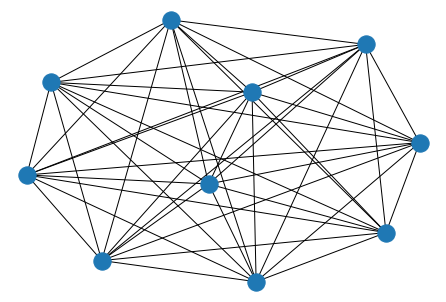

[((1, 0), (1, 0)), ((1, 0), (1, 4)), ((1, 0), (0, 8)), ((1, 0), (0, 9)), ((1, 4), (1, 4)), ((1, 4), (0, 8)), ((1, 4), (0, 9)), ((0, 8), (0, 9))]


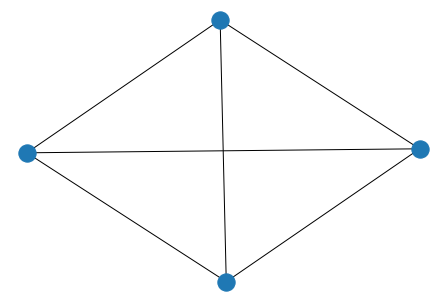

[((2, 0), (2, 0))]


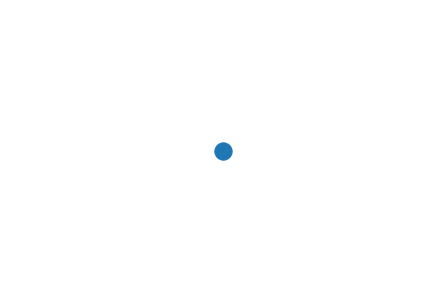

In [21]:
for i in archi:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    nx.draw(GG)
    plt.pause(1)
    plt.show()

---